<a href="https://colab.research.google.com/github/hyehyuni/essa/blob/main/ESAA_hw0327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[개념 정리]**
**3/27 과제 - 파이썬 머신러닝 완벽가이드 ch2.1~ 4 pg.87~117 부분**


# **CH2 - 사이킷런으로 시작하는 머신러닝**

## **2-1) 사이킷런 소개와 특징**
사이킷런은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리로, 가장 쉽고 효율적인 개발 라이브러리를 제공한다. 
* 매우 쉽고 가장 파이썬스러운 API를 제공한다. 
* 머신러닝을 위한 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공한다.
* 매우 많은 환경에서 사용되는 성숙한 라이브러리이다.


In [ ]:
# conda install scikit-learn

In [2]:
%pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import sklearn
print(sklearn.__version__)

1.2.2


## **2-2) 첫 번째 머신러닝 만들어보기 - 붓꽃 품종 예측하기**
붓꽃 데이터 세트는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처를 기반으로 꽃의 품종을 예측하기 위한 것입니다.

* 분류는 대표적인 지도학습 방법중 하나
* 지도학습은 학습을 위한 다양한 피처와 분류 결정값인 레이블 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 테이블을 예측한다. 
* 학습을 위해 주어진 데이터 세트를 학습 데이터 세트, 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트를 테스트 데이터 세트로 지칭
* 정리) 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측한 방식


1. sklearn.datasets 
* sklearn.datasets 내의 모듈은 사이킷런에서 자체적으로 제공하는 데이터 
2. sklearn.tree
* sklearn.tree s내의 모듈은 트리 기반 ML 알고리즘을 구현한 클래스의 모임이다. 
3. sklearn.model_selection
* sklearn.model_selection은 학습데이터와 검정 데이터, 예측 데이터로 ㄷ이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
# 붓꽃 데이터 세트를 로딩한다.
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data=iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블 데이터를 numpy로 가지고 있습니다. 
iris_label=iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환한다. 
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


피처에는 sepal length, sepal width, petal length, petal width가 있다. 레이블은 0,1,2 세가지 값으로 돼 있으며 0이 setosa품종, 1이 versicolor 품종, 2가 virginica 품종을 의미한다. 

#### 학습용 데이터와 테스트용 데이터를 분리해야한다. 
1) train_test_split() API를 제공 
- 이를 이용하면 학습 데이터와 테스트 데이터를 test_size 파라미터 입력 값의 비율로 쉽게 분할한다. 
- 예를 들어, test_size=0.2라면 테스트 데이터가 20%, 학습 데이터가 80%로 데이터를 분할한다,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

* iris_data : 피처 데이터 세트 
* iris_label : 레이블 데이터 세트 
* test_size : 전체 데이터 세트 중 테스트 데이터 세트의 비율 
* random_state : 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값 (이를 하지 않으면 코드 실행시마다 계속 달라진다)
* X_train : 학습용 피처 데이터 세트 
* X_test : 테스트용 피처 데이터 세트 
* y_train : 학습용 레이블 데이터 세트 
* y_test : 테스트용 레이블 데이터 세트 

In [ ]:
# 의사결정 트리를 이용해 학습과 예측을 수행 
# DecisionTreeClassifier 객체 생성 
dt_clf=DecisionTreeClassifier(random_state=11)
# 학습 수행 
dt_clf.fit(X_train, y_train)

# 의사 결정 트리 기반의 DecisionTreeClassifier 객체는 학습 데이터를 기반으로 학습이 완료됨 
# 예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야하며, 일반적으로 테스트 데이터 세트를 이용해야한다.

DecisionTreeClassifier(random_state=11)

predict() 메서드
* 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환하게 된다.

In [ ]:
pred=dt_clf.predict(X_test)

DecisionTreeClassifier의 예측 성능을 평가해보기
* 정확도는 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표 
* 사이킷런은 정확도 측정을 위해 accuracy_score() 함수를 제공한다.

In [ ]:
from sklearn.metrics import accuracy_score
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9333


붓꽃 데이터 세트로 분류를 예측한 프로세스 정리 
1. 데이터 세트 분리 
- 데이터를 학습 데이터와 테스트 데이터로 분리 
2. 모델 학습 
- 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킴
3. 예측 수행
- 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측
4. 평가 
- 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가

## **2-3) 사이킷런의 기반 프레임워크 익히기**

### Estimator 이해 및 fit( ), predict( ) 메서드 
* 사이킷런은 ML 모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해 predict() 메서드를 제공

1) 지도학습
* Regressor : 회귀 알고리즘을 구현한 클래스 
* Classifier : 분류 알고리즘을 구현한 클래스 
* 이 둘을 합쳐서 Estimator 클래스라고 부름 
* 즉, 지도학습의 모든 알고리즘을 구현한 클래스를 통칠해서 estimator라고 부른다. 
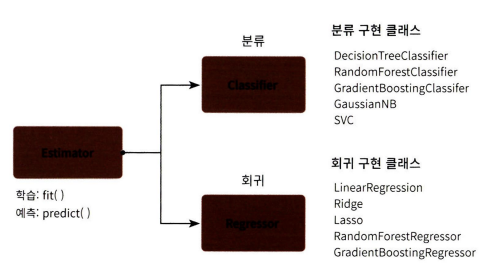

2) 비지도학습 
* 차원 축소, 클러스터링, 피처 추출 
* 위와 같은 클래스 역시 대부분 fit()과 transform()을 적용
* 그러나 여기서 fit()은 지도학습의 fit()과 달리 학습을 의미하는 것이 아니라 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업이다.
* 구조를 맞춘 후에 실제 작업은 transform()으로 수행 
* 사이킷런은 fit과 transform을 하나로 결합한 fit_transform을 제공

###**사이킷런의 주요 모듈**
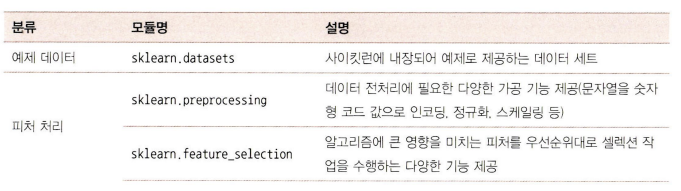
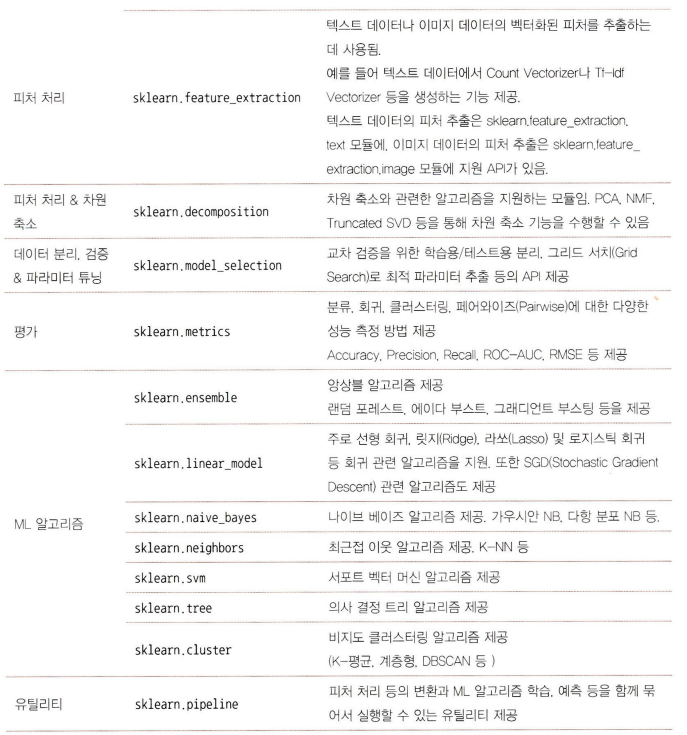

### **내장된 예제 데이터 세트**
사이킷런에 내장되어 있는 데이터 세트는 분류나 회귀를 연습하기 위한 예저용도의 데이터 세트와 분류나 클러스트링을 위해 표본 데이터로 생성될 수 있는 데이터 세트로 나눠진다. 
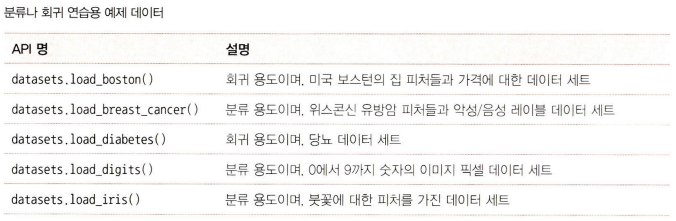

**fetch 계열의 명령**
- 데이터의 크기가 커서 패키지에 처음부터 저장되어 있지 않고, 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data라는 서브 디렉터리에 저장한 후 추후 불러들이는 데이터이다.
* fetch_covtype() : 회귀 분석용 토지 조사 자료 
* fetch_20newsgroups() : 뉴스 그룹 텍스트 자료 
* fetch_olivetti_faces() : 얼굴 이미지 자료 
* fetch_lfw_people() : 얼굴 이미지 자료 
* fetch__lfw_pairs() : 얼굴 이미지 자료 
* fetch_rcv1() : 로이터 뉴스 말뭉치 
* fetch_mldata() : ML 웹사이트에서 다운로드

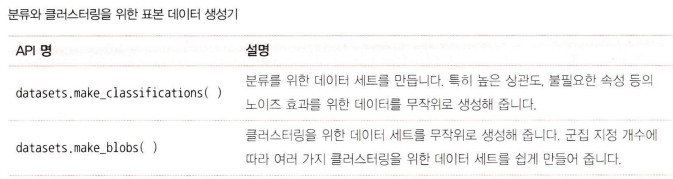

**연습용 예제 데이터 살펴보기** 
##### 키는 보통 data, target, target_name, feature_names, DESCR로 구성돼 있다. 
* data : 피처의 데이터 세트를 가르킨다.(넘파이) 
* target : 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트 (넘파이 배열)
* target_names : 개별 레이블의 이름을 나타냄 (넘파이 or 리스트) 
* feature_names : 피처의 이름을 나타냄 (넘파이 or 리스트) 
* DESCR : 데이터 세트에 대한 설명과 각 피처의 설명을 나타냄


In [5]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(type(iris_data))
# 'sklearn.utils._bunch.Bunch' 클래스는 파이썬 딕셔너리 자료형과 유사함 

<class 'sklearn.utils._bunch.Bunch'>


In [6]:
# 딕셔너리이므로 load_iris() 데이터의 key 값을 확인 
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


* 데이터 키는 피처들의 데이터 값을 가리킴 
* 피처 데이터 값을 추출하기 위해서는 데이터세트.data를 이용하면 됨 
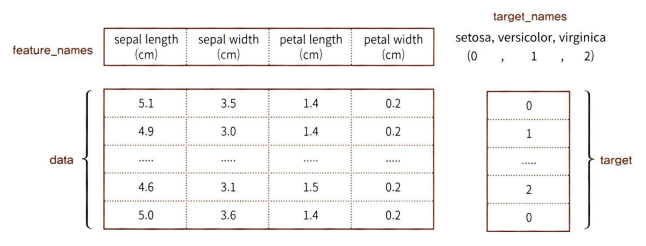

In [ ]:
print('\n feature_names의 type:',type(iris_data.feature_names))
print('feature_names의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:',type(iris_data.target_names))
print('target_names의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:',type(iris_data.data))
print(' data의 shape:',iris_data.data.shape)
print(iris_data['data'])

print('\n target의 type:',type(iris_data.target))
print(' target의 shape:',iris_data.target.shape)
print(iris_data.target)

## **2-4) Model Selection 모듈 소개**
사이킷런의 Model Selection 모듈은 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, 그리고 estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공한다.

### **학습/테스트 데이터 세트 분리 - train_test_split()**

In [12]:
# 테스트 데이터 세트를 사용하지 않고 학습 데이터 세트로만 학습하고 예측할 경우 생기는 문제 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris=load_iris()
dt_clf = DecisionTreeClassifier()
train_data=iris.data
train_label=iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터로 예측을 수행 
pred=dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label,pred))

예측 정확도: 1.0


**trian_test_split**
##### 첫번째 파라미터로 피처 데이터 세트, 두번째 파라미터로 레이블 데이터 세트를 입력 받음
* test_size : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정(디폴트는 0.25)
* train_size : 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링 할것인지(사용 빈도 낮음)
* shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지 결정 (디폴트는 트루)
* random_state : 호출할 때마다 동일한 학습, 테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data=load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=121)

In [17]:
# 학습데이터를 기반으로 DecisionTreeClassifier를 학습하고 예측 정확도 측정 
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.9556


## **교차검증**
* 사용 이유
##### 고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 테스트 데이터에만 최적의 성능을 발휘하도록 편향되게 모델이 만들어지고, 결국 해당 테스트 데이터에만 과적합되는 문제가 발생함. 따라서 다른 테스트용 데이터가 들어올 경우 성능이 저하되고, 이를 개선하기 위해 교차 검증을 사용한다.
* 설명 
##### 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증데이터 세트에서 학습과 평가를 수행함 

### **(1) k 폴드 교차검증**
##### 가장 보편적으로 사용되는 교차 검증 기법으로, k개의 데이터 폴드 세트를 만들어서 k번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법
* 설명(5 폴드 교차 검증)
##### 5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5번 평가를 수행 -> 5개의 평가를 평균한 결과를 가지고 예측 성능을 평가
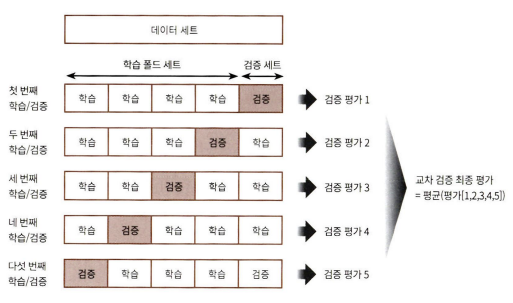

* 사이킷런에서는 k 폴드 교차 검증 프로세스를 구현하기 위해서 KFold와 StratifiedKFold 클래스를 제공

In [41]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import numpy as np

iris=load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

In [42]:
# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=156)
kfold = KFold(n_splits=5)
cv_accuracy= []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [43]:
n_iter=0
#KFold 객체의 split()를 호출 시 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 변환
for train_index, test_index in kfold.split(features):
  #Kfold.split()으로 반환된 인덱스를 이용해 학습용 검증용 테스트 데이터 추출
  x_train, x_test=features[train_index],features[test_index]
  y_train,y_test=label[train_index],label[test_index]
  #학습 및 예측
  dt_clf.fit(x_train, y_train)
  pred=dt_clf.predict(x_test)
  n_iter+=1
  #반복 시 마다 정확도 측정
  accuracy=np.round(accuracy_score(y_test, pred),4)
  train_size=x_train.shape[0]
  test_size=x_test.shape[0]
  print('\n#{0} 교차검증정확도 :{1}, 학습데이터크기: {2}, 검증데이터크기: {3}'.format(n_iter, accuracy, train_size,test_size))
  print('#{0} 검증세트인덱스 :{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

#개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균검증정확도: ', np.mean(cv_accuracy))


#1 교차검증정확도 :1.0, 학습데이터크기: 120, 검증데이터크기: 30
#1 검증세트인덱스 :[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차검증정확도 :0.9667, 학습데이터크기: 120, 검증데이터크기: 30
#2 검증세트인덱스 :[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차검증정확도 :0.8667, 학습데이터크기: 120, 검증데이터크기: 30
#3 검증세트인덱스 :[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차검증정확도 :0.9333, 학습데이터크기: 120, 검증데이터크기: 30
#4 검증세트인덱스 :[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차검증정확도 :0.7333, 학습데이터크기: 120, 검증데이터크기: 30
#5 검증세트인덱스 :[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균검증정확도:  0.9


### **(2) Stratified k 폴드**
#####  Stratified k 폴드는 불균형항 분포도를 가진 레이블 데이터 집합을 위한 k 폴드 방식이다. (불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 적어 한쪽으로 분포가 치우치는 것 )
* K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해준다.
* 이를 위해 Stratified K 폴드는 원본 데이터의 레이블 분포를 먼저 고려한 뒤, 이 분포와 동일하게 학습과 검증 데이터 세트를 분배

##### 왜곡된 레이블 데이터 세트에서는 반드시 Straitified K 폴드를 이용해 교차 검증을 해야함!

In [45]:
import pandas as pd
iris=load_iris()
iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [47]:
# 3개의 폴드 세트로 KFold를 생성 
kfold=KFold(n_splits=3)
n_iter=0
for train_index, test_index in kfold.split(iris_df):
  n_iter+=1
  label_train=iris_df['label'].iloc[train_index]
  label_test=iris_df['label'].iloc[test_index]
  print('##교차검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

# 교차 검증시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증레이블이 완전히 다른 값으로 추출됨
# 이렇게 검증 데이터세트를 분할하면 검증 예측 정확도는 0이 될 수 밖에 없음 

##교차검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
##교차검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
##교차검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [48]:
# split() 메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요 
from sklearn.model_selection import StratifiedKFold

skf=StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter+=1
  label_train=iris_df['label'].iloc[train_index]
  label_test=iris_df['label'].iloc[test_index]
  print('##교차검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포: \n', label_train.value_counts())
  print('검증 레이블 데이터 분포: \n', label_test.value_counts())

# 학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당됨을 알 수 있음 

##교차검증: 1
학습 레이블 데이터 분포: 
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    17
1    17
2    16
Name: label, dtype: int64
##교차검증: 2
학습 레이블 데이터 분포: 
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    17
2    17
1    16
Name: label, dtype: int64
##교차검증: 3
학습 레이블 데이터 분포: 
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 1    17
2    17
0    16
Name: label, dtype: int64


In [51]:
dt_clf = DecisionTreeClassifier(random_state=156)
skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요 
for train_index, test_index in skfold.split(features, label):
  # split()으로 반환된 인덱스를 이용해 학습용 검증용 테스트데이터 추출 
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측 
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  # 반복 시마다 정확도 측정 
  n_iter+=1
  accuracy=np.round(accuracy_score(y_test,pred),4)
  train_size=X_train.shape[0]
  test_size=X_test.shape[0]
  print('\n#{0} 교차검증정확도 :{1}, 학습데이터크기: {2}, 검증데이터크기: {3}'.format(n_iter, accuracy, train_size,test_size))
  print('#{0} 검증세트인덱스 :{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

#개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 교차검즐별정확도: ', np.round(cv_accuracy,4))
print('\n## 평균검증정확도: ', np.mean(cv_accuracy))



#1 교차검증정확도 :0.98, 학습데이터크기: 100, 검증데이터크기: 50
#1 검증세트인덱스 :[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차검증정확도 :0.94, 학습데이터크기: 100, 검증데이터크기: 50
#2 검증세트인덱스 :[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차검증정확도 :0.98, 학습데이터크기: 100, 검증데이터크기: 50
#3 검증세트인덱스 :[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차검즐별정확도:  [0.98 0.94 0.98]

## 평균검증정확도:  0.9666666666666667


### **교차검증을 보다 간편하게 - cross_val_score()** 
##### cross_val_score()는 앞에서 진행한 KFold 과정을 한번에 수행해주는 API이다. 
##### cross_val_score()는 classifier가 입력되면 Straitified K 폴드 방식으로 레이블 값의 분포에 따라 학습, 테스트 데이터 세트를 분할한다.


```
cross_val_score(estimator, X, y=None, scoring=None, cv=None,
                 n_jobs=1, verbose=0, fit_params=None, pre_dispatch=2*n_jobs)
```
* estimator : 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor를 의미 
* X는 피처 데이터 세트, y는 레이블 데이터 세트 
* scoring은 예측 성능 평가 지표 
* cv는 교차 검증 폴드 수 


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
iris_data=load_iris()
dt_clf =DecisionTreeClassifier(random_state=156)
data=iris_data.data
label=iris_data.target

# 성능 지표는 정확도, 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores,4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### **GridsearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에** 
이를 통해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공 

In [55]:
grid_parameters = {'max_depth':[1,2,3], 
                   'min_sample_split':[2,3]}

하이퍼 파라미터는 아래와 같이 순차적으로 적용되며 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행하면서 최적의 파라미터와 수행 결과를 도출할 수 있습니다. 

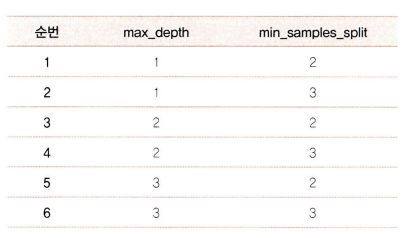

GridsearchCV는 교차 검증을 기반으로 이 하이퍼 파라미터의 최적 값을 찾게 해준다. 즉, 데이터 세트를 cross-validation을 위한 학습, 테스트 세트로 자동으로 분할한 뒤에 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있도록 함 

In [57]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris=load_iris()
X_train, X_test, y_train, y_test= train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

###파라미터를 딕셔너리 형태로 설정
parameters= {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [58]:
import pandas as pd

#paran_grid의 하이퍼 파라미터를 3개의 train, test set fold 로 나눠 테스트 수행 설정.
###rehit=True가 default. True이면 가장 좋은 파라미터 설정으로 재학습

grid_dtree=GridSearchCV(dtree, param_grid=parameters,cv=3, refit=True)

#붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터 순차적 학습/평가
grid_dtree.fit(X_train, y_train)

#GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df=pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score','split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


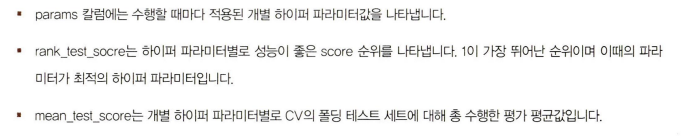

In [60]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [61]:
#gridserachcv의 refit으로 이미 학습된 estimator 반환
estimator= grid_dtree.best_estimator_

#gridserachcv의 best_estimator는이미 최적학습이 됐으므로 별도 학습 필요없음
pred=estimator.predict(X_test)
print('테스트 데이터 세트 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도:0.9667
